In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset from a specified file path
file_path = 'Movies_Overseas.csv'
data = pd.read_csv(file_path, delimiter=',', encoding='ISO-8859-1')  # Read CSV file with ',' as delimiter

## 1. Descriptive Analysis of the Dataset

### A. Description of the dataset.

In [3]:
# Display the first few rows of the dataset to understand its structure
data.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Runtime (min),Overseas ($mill)
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,130,111.9
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,132,159.7
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,126,166.9
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,109,63.1
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,131,132.3


The dataset provided includes several attributes such as the day of the week, director, genre, movie title, release date, studio, and various financial metrics like adjusted gross, budget, and overseas revenue.

### B. Numerical summaries for the feature variables.

In [4]:
# Convert appropriate columns to numeric where necessary
data['Adjusted Gross ($mill)'] = pd.to_numeric(data['Adjusted Gross ($mill)'], errors='coerce')
data['Budget ($mill)'] = pd.to_numeric(data['Budget ($mill)'], errors='coerce')
data['Gross ($mill)'] = pd.to_numeric(data['Gross ($mill)'], errors='coerce')
data['Overseas ($mill)'] = pd.to_numeric(data['Overseas ($mill)'], errors='coerce')

# Generate numerical summaries for the dataset's numerical and binary variables
numerical_summaries = data.describe(include=[np.number])  # Includes all numeric columns
numerical_summaries

,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Runtime (min),Overseas ($mill)
count,555.000000,608.000000,586.000000,608.000000,608.000000,608.000000,605.000000
mean,452.245586,92.467928,380.741809,6.923849,3.340378,117.781250,239.758347
std,186.138062,59.421407,182.089728,0.925890,0.454071,23.179122,157.605612
min,202.100000,0.600000,200.300000,3.600000,1.490000,30.000000,46.900000
25%,305.600000,45.000000,245.175000,6.375000,3.037500,100.000000,135.300000
50%,402.400000,80.000000,320.400000,6.900000,3.365000,116.000000,189.000000
75%,564.550000,130.000000,456.625000,7.600000,3.672500,130.250000,282.300000
max,991.000000,300.000000,987.500000,9.200000,4.500000,238.000000,960.500000


### Insights:

- **Count Discrepancies**: Not all columns have the same count, indicating missing data in some columns such as `Adjusted Gross ($mill)` and `Gross ($mill)`.
- **Adjusted Gross Earnings**:
  - The average adjusted gross earning is 452.25 million, with a high standard deviation of 186.14 million, indicating significant variability in movie earnings.
  - The range of adjusted gross earnings is wide, from 202.1 million to 991 million, showing some movies earn nearly five times as much as others.
- **Budget**:
  - The average movie budget is about 92.47 million, with a lower standard deviation (59.42 million) compared to gross earnings.
  - Budgets range from as low as 0.6 million to as high as 300 million, suggesting a diverse set of productions from low-budget to blockbuster films.
- **Total Gross**:
  - Average total gross is 380.74 million, also with substantial variability (std: 182.09 million).
  - The range for total gross (min: 200.3 million, max: 987.5 million) highlights significant differences in global market performance.
- **IMDb Rating**:
  - The average IMDb rating for movies is around 6.92, with a moderately low standard deviation of 0.93, indicating relatively consistent audience ratings.
  - Ratings span from 3.6 to 9.2, showing a wide variation in audience perception of movie quality.
- **MovieLens Rating**:
  - The average MovieLens rating is slightly lower than IMDb at 3.34, with a smaller standard deviation of 0.45.
  - The range is from 1.49 to 4.5, suggesting different scales or criteria might be used compared to IMDb ratings.
- **Runtime**:
  - The average runtime for a movie is approximately 117.78 minutes, with a typical range (std: 23.18 minutes).
  - Movie lengths vary from a short 30 minutes to a lengthy 238 minutes, accommodating a wide array of genres and storytelling styles.
- **Overseas Gross**:
  - The average overseas gross is 239.76 million, demonstrating the significant role of international markets in total earnings.
  - With a high standard deviation (157.61 million) and a range from 46.9 million to 960.5 million, the data highlights how some films perform exceptionally well internationally while others do not.

### C. Graphical Summaries

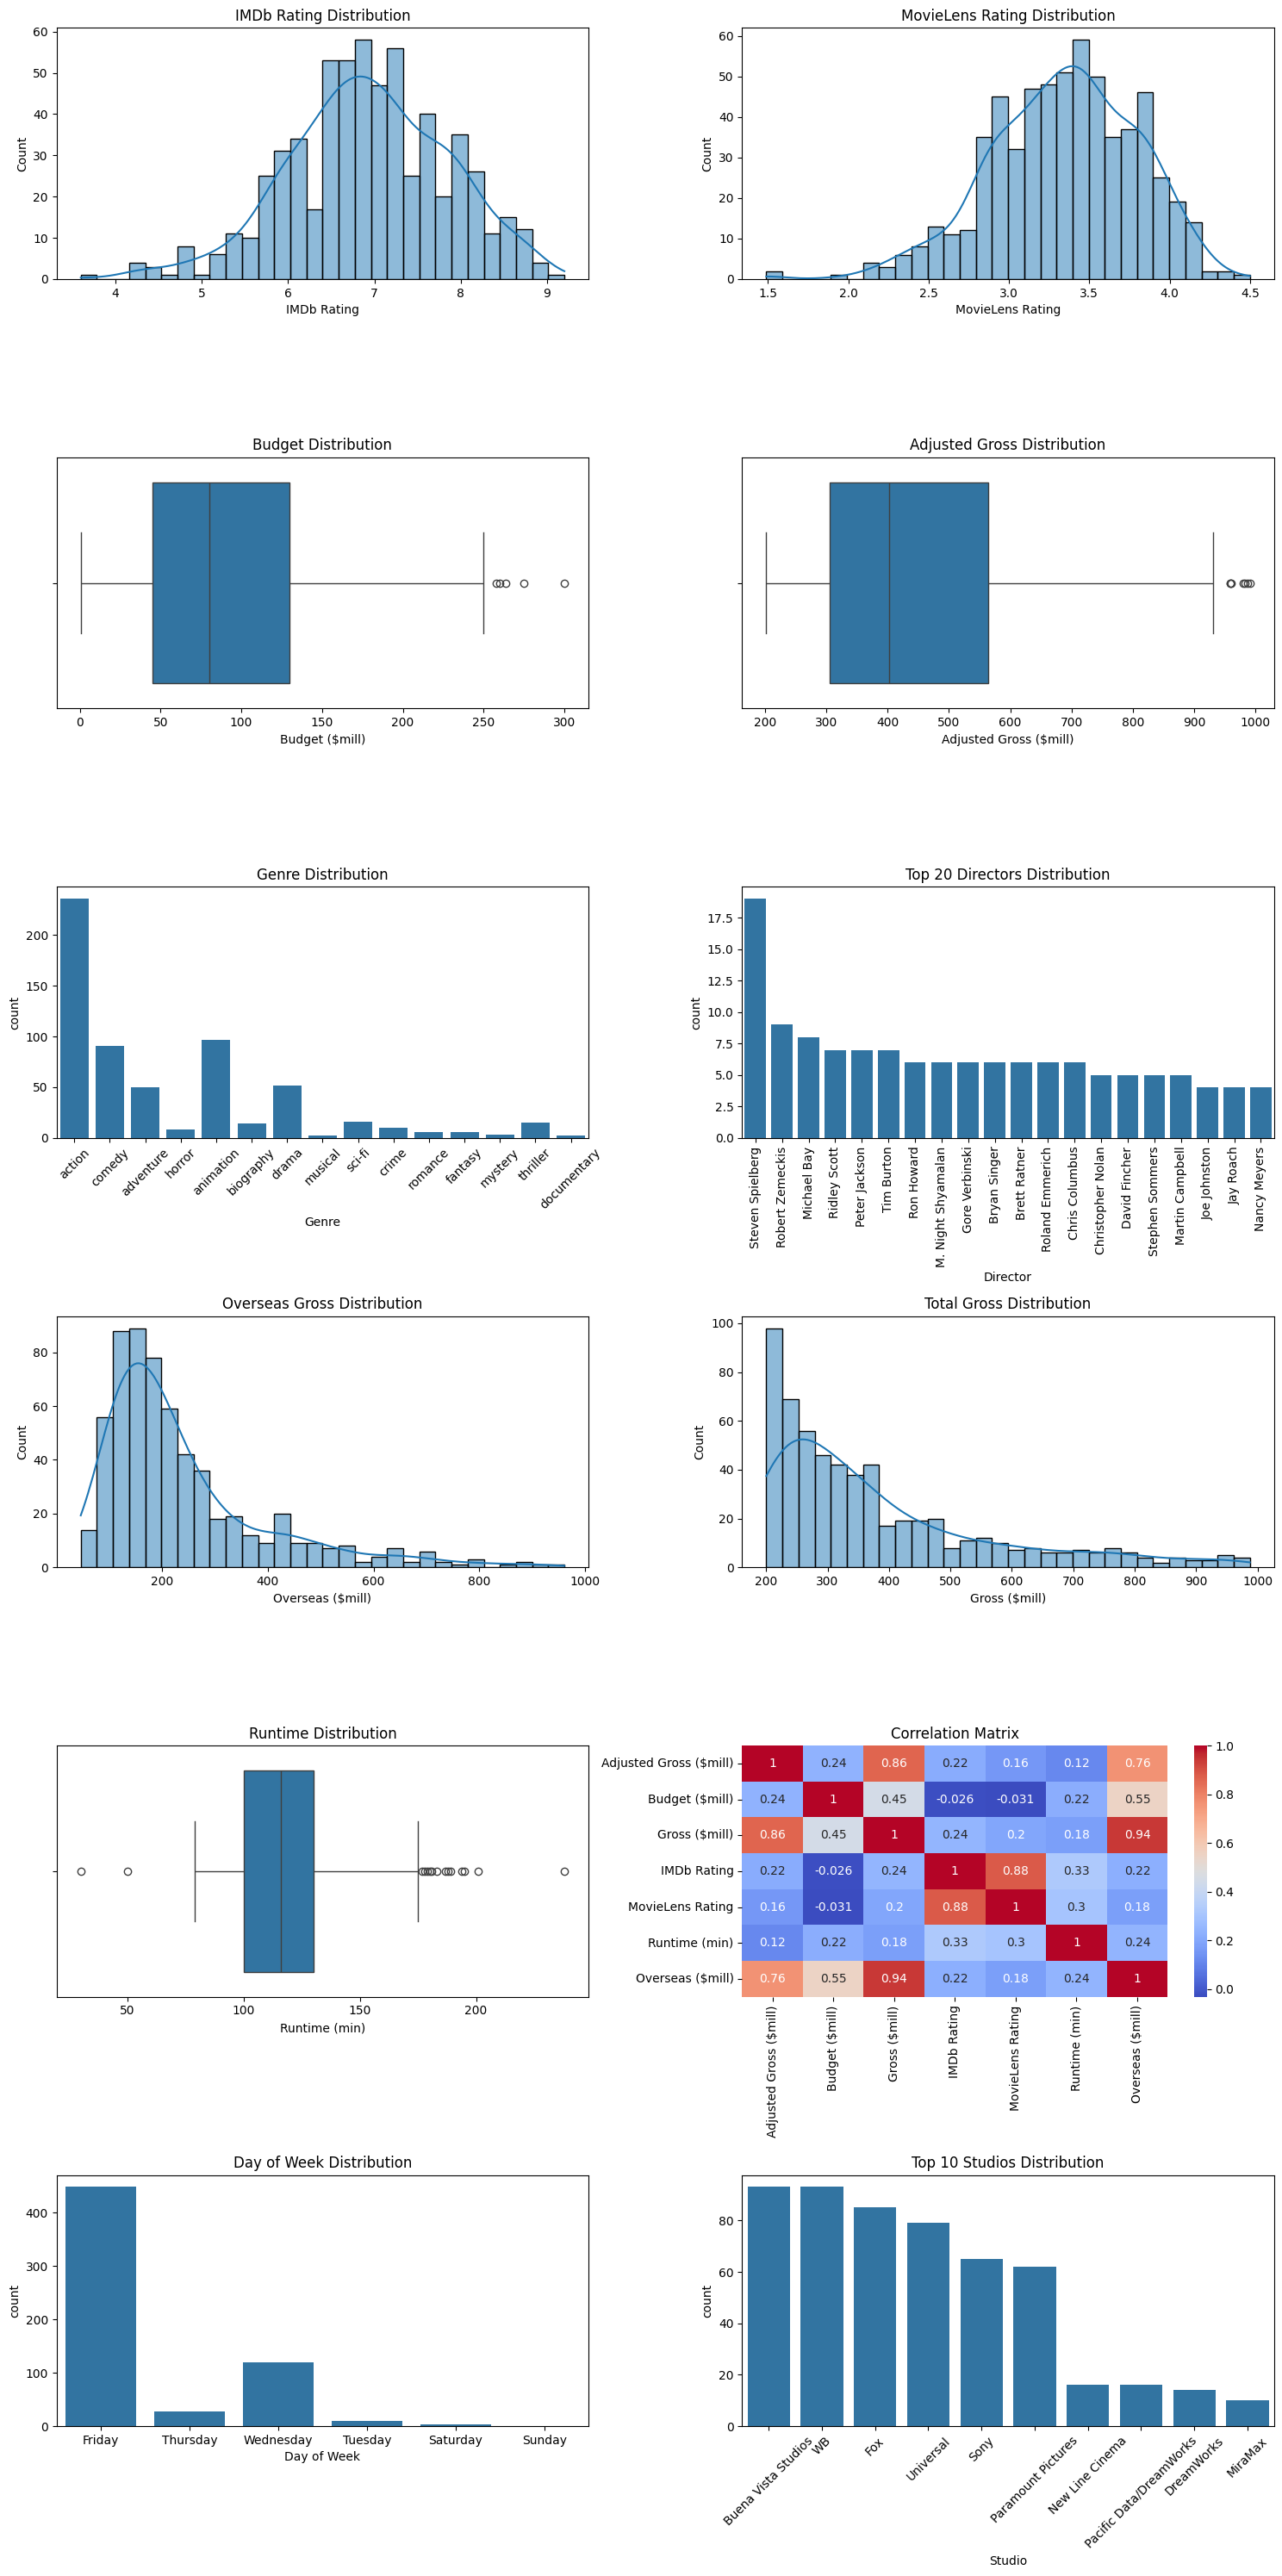

In [5]:
# Plotting 12 plots in a 6x2 grid
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 30))

# Histogram for IMDb Rating
sns.histplot(data['IMDb Rating'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('IMDb Rating Distribution')

# Histogram for MovieLens Rating
sns.histplot(data['MovieLens Rating'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('MovieLens Rating Distribution')

# Box plot for Budget
sns.boxplot(x=data['Budget ($mill)'], ax=axes[1, 0])
axes[1, 0].set_title('Budget Distribution')

# Box plot for Adjusted Gross
sns.boxplot(x=data['Adjusted Gross ($mill)'], ax=axes[1, 1])
axes[1, 1].set_title('Adjusted Gross Distribution')

# Count plot for Genre
sns.countplot(x=data['Genre'], ax=axes[2, 0])
axes[2, 0].set_title('Genre Distribution')
axes[2, 0].tick_params(axis='x', rotation=45)

# Count plot for Director (top 20)
top_directors = data['Director'].value_counts().head(20).index
sns.countplot(x=data['Director'], order=top_directors, ax=axes[2, 1])
axes[2, 1].set_title('Top 20 Directors Distribution')
axes[2, 1].tick_params(axis='x', rotation=90)

# Histogram for Overseas Gross
sns.histplot(data['Overseas ($mill)'], bins=30, kde=True, ax=axes[3, 0])
axes[3, 0].set_title('Overseas Gross Distribution')

# Histogram for Gross
sns.histplot(data['Gross ($mill)'], bins=30, kde=True, ax=axes[3, 1])
axes[3, 1].set_title('Total Gross Distribution')

# Box plot for Runtime
sns.boxplot(x=data['Runtime (min)'], ax=axes[4, 0])
axes[4, 0].set_title('Runtime Distribution')

# Correlation Matrix
corr = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[4, 1])
axes[4, 1].set_title('Correlation Matrix')

# Fill remaining plots (e.g., with additional count plots or histograms)
sns.countplot(x=data['Day of Week'], ax=axes[5, 0])
axes[5, 0].set_title('Day of Week Distribution')

# Additional count plot for Studio
top_studios = data['Studio'].value_counts().head(10).index
sns.countplot(x=data['Studio'], order=top_studios, ax=axes[5, 1])
axes[5, 1].set_title('Top 10 Studios Distribution')
axes[5, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

1. **IMDb Rating Distribution**: A histogram showing the distribution of IMDb ratings.
2. **MovieLens Rating Distribution**: A histogram for the distribution of MovieLens ratings.
3. **Budget Distribution**: A box plot showing the spread and outliers of movie budgets.
4. **Adjusted Gross Distribution**: A box plot for the distribution of adjusted gross revenues.
5. **Genre Distribution**: A count plot showing the frequency of each genre.
6. **Top 20 Directors Distribution**: A count plot for the most frequent directors in the dataset.
7. **Overseas Gross Distribution**: A histogram for the distribution of overseas gross revenues.
8. **Total Gross Distribution**: A histogram for the distribution of total gross revenues.
9. **Runtime Distribution**: A box plot showing the runtime of movies.
10. **Correlation Matrix**: A heatmap displaying correlations between numeric variables.
11. **Day of Week Distribution**: A count plot showing the frequency of movies released on different days of the week.
12. **Top 10 Studios Distribution**: A count plot for the most frequent production studios.

### D. Comments on Numerical and Graphical Summaries.

#### Numerical Summaries
1. **IMDb and MovieLens Ratings**: The histograms indicate the distribution of movie ratings on IMDb and MovieLens. The shape of these distributions could suggest the overall quality of movies within the dataset. A skew towards higher ratings might indicate a selection of generally well-received movies.

2. **Budget and Gross Revenues**: The box plots for the budget and gross revenues (both adjusted and total) help identify the spread and presence of outliers. Movies with extremely high budgets or revenues can significantly influence your analysis, particularly if you're evaluating financial success or return on investment.

3. **Overseas Gross**: The histogram for overseas gross revenue shows how movies fare in international markets, which can be crucial for understanding the global appeal of certain genres or directors.

#### Graphical Summaries
1. **Genre and Director Distribution**: The count plots for genre and directors reveal the most common genres and the directors who are most frequently involved in the dataset. This can indicate market preferences or the dataset's focus areas.

2. **Runtime Distribution**: The runtime box plot shows a typical range for movie lengths. This can be useful for understanding consumer preferences or industry standards for movie durations.

3. **Correlation Matrix**: The heatmap provides insights into the relationships between various numerical features. For instance, correlations between budget and gross revenues can indicate if higher investments typically lead to higher returns. It's also useful to observe how ratings correlate with financial metrics, which might suggest if higher-rated movies tend to perform better financially.

4. **Release Timing (Day of Week and Studio)**: These plots help understand strategic decisions regarding movie releases. For example, movies might be released on specific days to maximize attendance and revenue. Similarly, knowing which studios are most active can indicate leading players in the industry.

#### Overall
- The dataset is rich with information that can be leveraged for deeper financial analysis, market trend observation, and strategic planning in the film industry.
- The presence of outliers in financial data suggests that some films perform exceptionally well or poorly, which could warrant a separate detailed analysis to understand such anomalies.
- The variability in movie lengths and budgets across genres could be further explored to optimize production and marketing strategies.

## 2. Preprocessing Tasks:

Here’s how I’ll approach these tasks:

1. **Encode Categorical Variables**: Identify and encode categorical columns like 'Day of Week', 'Director', 'Genre', 'Studio', etc.
2. **Normalization**: Apply both Z-Score normalization (Standard Scaling) and Min-Max normalization to the relevant numerical columns.

In [6]:
# Check for NaN values in each column
for column in data.columns:
    nan_count = data[column].isna().sum()
    print(f'Column {column} has {nan_count} NaN values.')

Column Day of Week has 0 NaN values.
Column Director has 0 NaN values.
Column Genre has 0 NaN values.
Column Movie Title has 0 NaN values.
Column Release Date has 0 NaN values.
Column Studio has 0 NaN values.
Column Adjusted Gross ($mill) has 53 NaN values.
Column Budget ($mill) has 0 NaN values.
Column Gross ($mill) has 22 NaN values.
Column IMDb Rating has 0 NaN values.
Column MovieLens Rating has 0 NaN values.
Column Runtime (min) has 0 NaN values.
Column Overseas ($mill) has 3 NaN values.


In [7]:
# Handling NaN values by dropping or imputing
data.dropna(inplace=True) 

In [8]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['Day of Week', 'Director', 'Genre', 'Studio']
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [9]:
# Normalization functions
def apply_standard_scaling(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

def apply_min_max_scaling(X):
    scaler = MinMaxScaler()
    return scaler.fit_transform(X)

In [10]:
# Prepare features and target
X = data.drop(['Movie Title', 'Release Date', 'Adjusted Gross ($mill)', 'Gross ($mill)'], axis=1)
y = data['Adjusted Gross ($mill)']

In [11]:
# Applying Z-Score Normalization
X_standard = apply_standard_scaling(X)

In [12]:
# Applying Min-Max Normalization
X_min_max = apply_min_max_scaling(X)

We have successfully prepared two versions of the dataset with different normalization techniques applied.

## 3. Data Split and Training

In [13]:
# List of all random states used in the experiments
random_states = [1, 20, 40]

In [14]:
# Function to split data and train models
def train_models(X, y, random_states, normalization_method):
    results = []
    for state in random_states:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)
        models = {
            'Linear Regression': LinearRegression(),
            'Linear SVM': SVR(kernel='linear'),
            'Poly. SVM': SVR(kernel='poly'),
            'RBF SVM': SVR(kernel='rbf'),
            'Neural Networks': MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
        }
        for name, model in models.items():
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            mse = mean_squared_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)
            results.append({
                'Normalization': normalization_method,
                'Random State': state,
                'Model': name,
                'MSE': mse,
                'R2': r2
            })
            print(f"Model: {name}, Norm: {normalization_method}, State: {state}, MSE: {mse:.4f}, R2: {r2:.4f}")
    return pd.DataFrame(results)

In [15]:
# Using the function for both normalization methods
print("\033[1mResults for Standard Scaling:\033[0m")
results_standard = train_models(X_standard, y, random_states, 'Standard Scaling')
print("\n\033[1mResults for Min-Max Normalization:\033[0m")
results_min_max = train_models(X_min_max, y, random_states, 'Min-Max Normalization')

Results for Standard Scaling:
Model: Linear Regression, Norm: Standard Scaling, State: 1, MSE: 14869.5552, R2: 0.5590
Model: Linear SVM, Norm: Standard Scaling, State: 1, MSE: 19993.4979, R2: 0.4070
Model: Poly. SVM, Norm: Standard Scaling, State: 1, MSE: 34516.0428, R2: -0.0237
Model: RBF SVM, Norm: Standard Scaling, State: 1, MSE: 35297.3138, R2: -0.0469
Model: Neural Networks, Norm: Standard Scaling, State: 1, MSE: 18065.6752, R2: 0.4642
Model: Linear Regression, Norm: Standard Scaling, State: 20, MSE: 10838.7507, R2: 0.6603
Model: Linear SVM, Norm: Standard Scaling, State: 20, MSE: 12297.8148, R2: 0.6145
Model: Poly. SVM, Norm: Standard Scaling, State: 20, MSE: 27724.7056, R2: 0.1310
Model: RBF SVM, Norm: Standard Scaling, State: 20, MSE: 29440.7295, R2: 0.0772
Model: Neural Networks, Norm: Standard Scaling, State: 20, MSE: 14538.0859, R2: 0.5443
Model: Linear Regression, Norm: Standard Scaling, State: 40, MSE: 12702.6966, R2: 0.6228
Model: Linear SVM, Norm: Standard Scaling, State

#### Code Explaination of last previous 2 cells:

1. **Define Function**: A function `train_models` is defined to train various machine learning models. It takes features matrix `X`, target vector `y`, a list of random states, and the normalization method as inputs.

2. **Initialize Results List**: Initializes an empty list `results` to store the performance metrics of each model run.

3. **Loop Over Random States**:
    - Splits the data into training and testing sets using `train_test_split` from scikit-learn. This is done iteratively for each random state provided in the `random_states` list, ensuring different train-test splits for each iteration.
    - Defines a dictionary `models` containing instances of different regression models (Linear Regression, Linear SVM, Polynomial SVM, RBF SVM, and Neural Networks).

4. **Model Training and Prediction**:
    - Iterates over each model in the `models` dictionary.
    - Fits the model on the training data.
    - Makes predictions on the testing data.
    - Calculates Mean Squared Error (MSE) and R-Squared (R2) scores to evaluate model performance.

5. **Store Results**: Appends the results including the normalization method, random state, model name, MSE, and R2 into the `results` list.

6. **Return Results**: Converts the `results` list into a DataFrame and returns it.

7. **Execute Function for Both Normalization Methods**: Calls `train_models` twice, once for data normalized by standard scaling and once for data normalized by Min-Max scaling, printing distinct headers for each to differentiate outputs.

## Combining Results and Creating Pivot Tables

In [16]:
# Combine results from both normalization methods
combined_results = pd.concat([results_standard, results_min_max])

In [17]:
# Function to create pivot tables for each random state and the overall average
def create_pivot_tables(results, states):
    for state in states:
        state_results = results[results['Random State'] == state]
        pivot_table = state_results.pivot_table(
            index='Model',
            columns='Normalization',
            values=['MSE', 'R2'],
            aggfunc='mean'
        )
        print(f"\nResults for Random State {state}:")
        display(pivot_table)

    # Creating a pivot table for the average results across all random states
    overall_average = results.pivot_table(
        index='Model',
        columns='Normalization',
        values=['MSE', 'R2'],
        aggfunc='mean'
    )
    print("\nAverage Results Across All Random States:")
    display(overall_average)

In [18]:
# Execute the function to print pivot tables for each random state and the overall average
create_pivot_tables(combined_results, random_states)


Results for Random State 1:


MSE                   \
Normalization     Min-Max Normalization Standard Scaling   
Model                                                      
Linear Regression          14869.555222     14869.555222   
Linear SVM                 35393.234476     19993.497940   
Neural Networks            29885.467679     18065.675181   
Poly. SVM                  24079.952881     34516.042805   
RBF SVM                    35871.547713     35297.313847   

                                     R2                   
Normalization     Min-Max Normalization Standard Scaling  
Model                                                     
Linear Regression              0.558994         0.558994  
Linear SVM                    -0.049703         0.407027  
Neural Networks                0.113648         0.464203  
Poly. SVM                      0.285830        -0.023687  
RBF SVM                       -0.063889        -0.046858


Results for Random State 20:


MSE                   \
Normalization     Min-Max Normalization Standard Scaling   
Model                                                      
Linear Regression          10838.750729     10838.750729   
Linear SVM                 29313.652686     12297.814823   
Neural Networks            25057.228587     14538.085935   
Poly. SVM                  15528.277327     27724.705613   
RBF SVM                    29981.557529     29440.729533   

                                     R2                   
Normalization     Min-Max Normalization Standard Scaling  
Model                                                     
Linear Regression              0.660255         0.660255  
Linear SVM                     0.081152         0.614520  
Neural Networks                0.214571         0.544298  
Poly. SVM                      0.513260         0.130958  
RBF SVM                        0.060216         0.077168


Results for Random State 40:


MSE                   \
Normalization     Min-Max Normalization Standard Scaling   
Model                                                      
Linear Regression          12702.696633     12702.696633   
Linear SVM                 31841.156649     14357.045777   
Neural Networks            21452.652255     16569.035494   
Poly. SVM                  15886.567405     29613.183363   
RBF SVM                    32496.226200     32040.592629   

                                     R2                   
Normalization     Min-Max Normalization Standard Scaling  
Model                                                     
Linear Regression              0.622769         0.622769  
Linear SVM                     0.054415         0.573640  
Neural Networks                0.362922         0.507950  
Poly. SVM                      0.528218         0.120579  
RBF SVM                        0.034962         0.048493


Average Results Across All Random States:


MSE                   \
Normalization     Min-Max Normalization Standard Scaling   
Model                                                      
Linear Regression          12803.667528     12803.667528   
Linear SVM                 32182.681270     15549.452847   
Neural Networks            25465.116174     16390.932203   
Poly. SVM                  18498.265871     30617.977260   
RBF SVM                    32783.110480     32259.545336   

                                     R2                   
Normalization     Min-Max Normalization Standard Scaling  
Model                                                     
Linear Regression              0.614006         0.614006  
Linear SVM                     0.028621         0.531729  
Neural Networks                0.230380         0.505484  
Poly. SVM                      0.442436         0.075950  
RBF SVM                        0.010430         0.026268

#### Code Explaination of last previous 2 cellss:

1. **Combine Results**: Merges the results from standard scaling and Min-Max normalization into a single DataFrame using `pd.concat`.

2. **Define Pivot Table Creation Function**: A function `create_pivot_tables` is defined to create and display pivot tables for each random state and the overall average results.

3. **Loop Over Random States for Pivot Tables**:
    - For each random state, filters the combined results and creates a pivot table showing mean MSE and R2 for each model and normalization method.
    - Uses `display()` to show the pivot table for each random state.

4. **Overall Average Results**:
    - After looping through individual states, computes and displays a pivot table of the overall average MSE and R2 for each model and normalization method across all random states.

5. **Execute Pivot Table Function**: Calls `create_pivot_tables` to execute the functionality of generating and displaying the required pivot tables for both individual random states and the overall averages.